In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
initdata = pd.read_csv('Admission_Predict_Ver1.1.csv', index_col = "Serial No.")

In [3]:
data = initdata.drop(columns='LOR ')

Between the two included files, we are going to use the Ver1.1 File as it includes an additional 100 entries that we can utilize for our study.

### Variables
GRE Scores ( out of 340 ) - Scores in standartized testing

TOEFL Scores ( out of 120 ) - Scores in standartized testing

University Rating ( out of 5 ) - Rating of the School applied to

Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) - Rating of the Written Application 1-5 .5 intervals are possible.

Undergraduate GPA ( out of 10 ) - GPA during undergraduate studies for applicant.

Research Experience ( either 0 or 1 ) - Boolean True or False if applicant has research experience.

Chance of Admit ( ranging from 0 to 1 ) - A probability of being admitted to program.


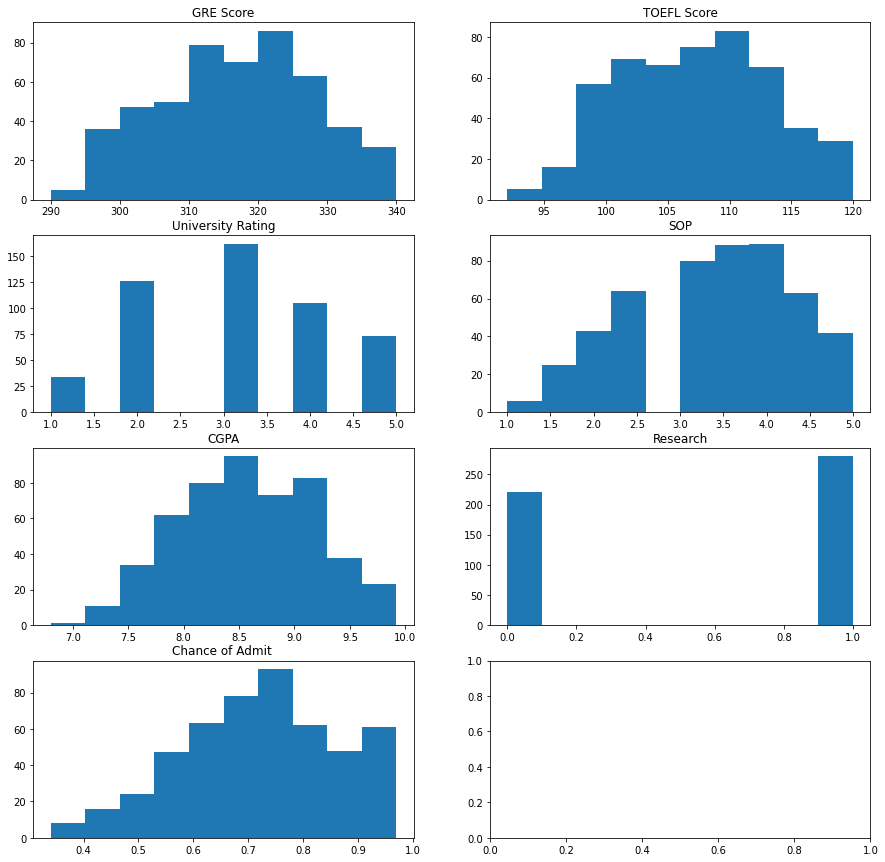

In [133]:
fig, axs = plt.subplots(4, 2,figsize=(15,15))
axs[0, 0].hist(data['GRE Score'])
axs[0, 0].set_title('GRE Score')
axs[0, 1].hist(data['TOEFL Score'])
axs[0, 1].set_title('TOEFL Score')
axs[1, 0].hist(data['University Rating'])
axs[1, 0].set_title('University Rating')
axs[1, 1].hist(data['SOP'])
axs[1, 1].set_title('SOP')
axs[2, 0].hist(data['CGPA'])
axs[2, 0].set_title('CGPA')
axs[2, 1].hist(data['Research'])
axs[2, 1].set_title('Research')
axs[3, 0].hist(data['Chance of Admit '])
axs[3, 0].set_title('Chance of Admit ')
fig.savefig('full_figure.png')

In [5]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.712154,0.408116,0.684137
CGPA,0.825878,0.810574,0.705254,0.712154,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.882413,0.545871,1.000000


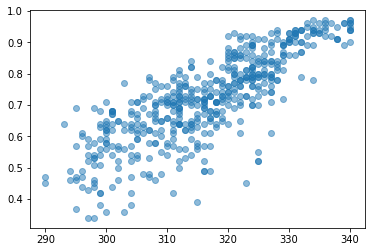

In [6]:
plt.scatter(data['GRE Score'],data['Chance of Admit '], alpha = .5)

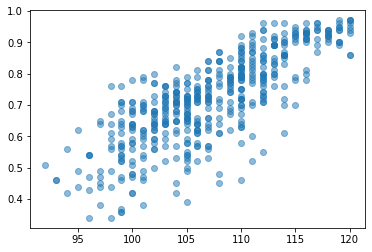

In [7]:
plt.scatter(data['TOEFL Score'],data['Chance of Admit '], alpha = .5)

In [8]:
normalized_data=(data-data.min())/(data.max()-data.min())
normalized_data

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,Chance of Admit
Serial No.,,,,,,,
1,0.94,0.928571,0.75,0.875,0.913462,1.0,0.920635
2,0.68,0.535714,0.75,0.750,0.663462,1.0,0.666667
3,0.52,0.428571,0.50,0.500,0.384615,1.0,0.603175
4,0.64,0.642857,0.50,0.625,0.599359,1.0,0.730159
5,0.48,0.392857,0.25,0.250,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...
496,0.84,0.571429,1.00,0.875,0.711538,1.0,0.841270
497,0.94,0.892857,1.00,1.000,0.983974,1.0,0.984127
498,0.80,1.000000,1.00,0.875,0.884615,1.0,0.936508


In [73]:
indep = normalized_data.loc[:,'GRE Score':'Research']
dep = normalized_data['Chance of Admit ']

In [76]:
resultlist = []
for m in range(1,6):
    cc = list(combinations(data.loc[:,'GRE Score':'Research'].columns,m))
    for combo in cc:
        X = indep[list(combo)]
        scores = []
        for n in range(100):
            X_train, X_test, y_train, y_test = train_test_split(X, dep, test_size=0.2)
            linreg = LinearRegression().fit(X_train,y_train)
            scores.append(linreg.score(X_test,y_test))
        prediction = linreg.predict(X_test[list(combo)])
        mse = mean_squared_error(y_test, prediction)
        rmse = np.sqrt(mse)
        resultlist.append([list(combo),np.mean(scores),rmse])

In [136]:
regdata = pd.DataFrame(resultlist, columns = ['Explanatory Variable','R^2','RMSE'])
top = regdata.sort_values('R^2',ascending=False)
top.head()

,Explanatory Variable,R^2,RMSE
59,"[GRE Score, TOEFL Score, SOP, CGPA, Research]",0.808073,0.082267
58,"[GRE Score, TOEFL Score, University Rating, CG...",0.806433,0.088529
60,"[GRE Score, University Rating, SOP, CGPA, Rese...",0.805715,0.103211
61,"[TOEFL Score, University Rating, SOP, CGPA, Re...",0.805065,0.092415
56,"[GRE Score, TOEFL Score, University Rating, SO...",0.804362,0.078461


In [135]:
array = top['Explanatory Variable'].head().values
array

array([list(['GRE Score', 'TOEFL Score', 'SOP', 'CGPA', 'Research']),
       list(['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA', 'Research']),
       list(['GRE Score', 'University Rating', 'SOP', 'CGPA', 'Research']),
       list(['TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'Research']),
       list(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA'])],
      dtype=object)

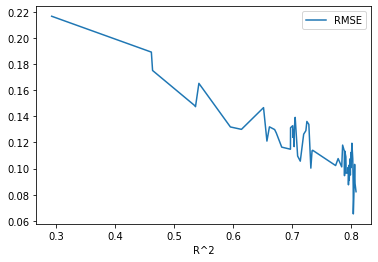

In [85]:
top.plot('R^2','RMSE')

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, dep, test_size=0.2)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

rfr_prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, rfr_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rfr_prediction)

In [114]:
print('Random Forest Regressor')
print('Root Mean Sqared Error: ',rmse)
print('R^2: ',r2)

Random Forest Regressor
Root Mean Sqared Error:  0.10240487785226113
R^2:  0.7843970963734095


In [115]:
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)

etr_prediction = etr.predict(X_test)

mse = mean_squared_error(y_test, etr_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, etr_prediction)

In [116]:
print('Extra Trees Regressor')
print("Root Mean Squared Error : ",rmse)
print("R^2", r2)

Extra Trees Regressor
Root Mean Squared Error :  0.10447922269188674
R^2 0.7755739925749454


In [117]:
bestlin = ['GRE Score', 'TOEFL Score', 'SOP', 'CGPA', 'Research']
X_train, X_test, y_train, y_test = train_test_split(indep[bestlin], dep, test_size=0.2)

linreg = LinearRegression().fit(X_train,y_train)
prediction = linreg.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = linreg.score(X_test,y_test)

In [118]:
print('Linear Regressor')
print("Root Mean Squared Error : ",rmse)
print("R^2", r2)

Linear Regressor
Root Mean Squared Error :  0.1072417369037945
R^2 0.8184068430362056
